<a href="https://colab.research.google.com/github/AUT-Student/NN-HW5/blob/main/NN_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense, Input, Concatenate
import tensorflow.keras.backend as K
from keras.models import Sequential 

# Dataset

In [2]:
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp1.data
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp2.data
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp3.data
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp4.data
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp5.data

Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp1.data
To: /content/lp1.data
100% 27.3k/27.3k [00:00<00:00, 464kB/s]
Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp2.data
To: /content/lp2.data
100% 14.6k/14.6k [00:00<00:00, 254kB/s]
Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp3.data
To: /content/lp3.data
100% 14.5k/14.5k [00:00<00:00, 253kB/s]
Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp4.data
To: /content/lp4.data
100% 33.6k/33.6k [00:00<00:00, 560kB/s]
Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp5.data
To: /content/lp5.data
100% 49.2k/49.2k [00:00<00:00, 392kB/s]


In [9]:
normal_label_datasets = ["normal","normal","ok","normal","normal"]

dataset_x = []
dataset_y = []
for i in range(5):
  normal_label = normal_label_datasets[i]
  dataset_i = pd.read_csv(f"/content/lp{i+1}.data", header=None)
  
  new_label = None
  new_data = None

  for j, row in dataset_i.iterrows():
    if j%16==0:
      new_data = []
      
      if row[0] == normal_label:
         new_label = 0
      else:
         new_label = 1

    else:
      new_data.append([float(item) for item in row[0].split()])

      if j%16==15:
        dataset_x.append(new_data)
        dataset_y.append(new_label)

In [10]:
dataset_x, dataset_y = shuffle(dataset_x, dataset_y, random_state=0)

# Elman Network

In [43]:
class ElmanOld(keras.Model):
  def __init__(self):
    super().__init__(self)

    # inputs = Input(6)    
    # hidden = Dense(3)
    # output = Dense(2, activation="softmax")
    
    self.model = Sequential([
                             Input(8, name="Input"),
                             Dense(3, name="Hidden"),
                             Dense(2, activation="softmax", name="Output")
    ])
    
    self.x = K.constant([[0., 0.]])

    # x = output

    # self.model = keras.Model(inputs, output(inputs))

  def sub_call(self, input):
    print("sub call")
    print(f"input = {input}")
    print(f"self.x = {self.x}")
    # input = K.concatenate([tf.expand_dims(input, axis=0), self.x])
    input = tf.expand_dims(input, axis=0)
    concated = K.concatenate([input, self.x])
    output = self.model.call(concated)
    
    self.x = output

    return output

  def call(self, inputs):

    print(f"inputs = {inputs}")

    inputs = inputs[0]

    output = K.constant([[0., 0.]])
    for input in inputs:
      print(f"input = {input}")
      output = self.sub_call(input)
      print(f"output = {output}")

    return output

    # new_inputs_array = []
    # for input in inputs:
    #   new_inputs_array.append(K.concatenate([input, self.x]))
    
    # inputs = K.stack(new_inputs_array)

In [67]:
class Elman(keras.Model):
  def __init__(self):
    super().__init__(self)

    self.model = Sequential([
                             Input(8, name="Input"),
                             Dense(3, name="Hidden"),
                             Dense(2, activation="softmax", name="Output")
    ])

  def sub_call(self, input, prev_input):
    if len(prev_input)==1:
      concated = K.concatenate([input, K.constant([0., 0.])])
      concated = tf.expand_dims(concated, axis=0)
    else:
      prev_output = self.sub_call(prev_input[-1], prev_input[:-1])

      input = tf.expand_dims(input, axis=0)
      concated = K.concatenate([input, prev_output])
    
    output = self.model.call(concated)  
    return output

  def call(self, inputs):
    inputs = inputs[0]

    input = inputs[-1]
    prev_input = inputs[:-1]

    return self.sub_call(input, prev_input)

In [68]:
elman = Elman()

In [75]:
elman.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [76]:
elman.fit(x=dataset_x, y=dataset_y, epochs=20, batch_size=1)

Epoch 1/20
inputs = Tensor("IteratorGetNext:0", shape=(1, 15, 6), dtype=float32)
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
inputs = Tensor("IteratorGetNext:0", shape=(1, 15, 6), dtype=float32)
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
sub call
463/463 [==============================] - 2s 2ms/step - loss: 0.5364 - accuracy: 0.7235
Epoch 2/20
463/463 [==============================] - 1s 2ms/step - loss: 0.4840 - accuracy: 0.7041
Epoch 3/20
463/463 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.6847
Epoch 4/20
463/463 [==============================] - 1s 2ms/step - loss: 0.4877 - accuracy: 0.7063
Epoch 5/20
463/463 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.7127
Epoch 6/20
463/463 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7235
Epoch 7/

In [72]:
elman.summary()

Model: "elman_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 2)                 35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


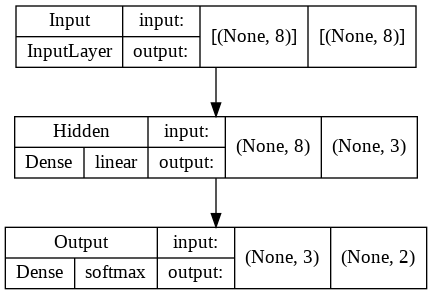

In [73]:
keras.utils.plot_model(elman.model, show_layer_activations=True, show_shapes=True, show_layer_names=True)